# Asteroid Logistic Regression
The data is about Asteroids - NeoWs.
NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

## Acknowledgements
Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

## Inspiration
Finding potential hazardous and non-hazardous asteroids
Features responsible for claiming an asteroid to be hazardous

## Variables: (n=21)

* **Absolute Magnitude**: Measure of asteroid's intrinsic mean brightness
* **Estimated Diameter**: Approximate asteroid size measured by diameter
* **Minimum Orbit Intersection**: minimum distance between osculating orbits of Earth and the asteroid
* **Orbital Period**: time it takes for asteroid to complete one full orbit
* **Perihelion Distance**: Distance of asteroid from sun when it is closest

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={"figure.figsize": (10, 6)})
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot') # setting the plot style
%matplotlib inline
from __future__ import print_function, unicode_literals, division

# ignore various warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
asteroidData = pd.read_csv("nasa.csv")

# Exploratory Data Analysis


In [ ]:
asteroidData.head()


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


There are many redundant variables. We are going to drop some columns.




In [ ]:
#Let's get the columns of our dataset
asteroidData.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

Let's trim down the unwanted ones.


In [ ]:
asteroidData.drop(['Neo Reference ID', 'Name','Est Dia in M(min)', 'Est Dia in M(max)','Close Approach Date',
       'Epoch Date Close Approach','Est Dia in Miles(max)','Est Dia in Miles(min)','Est Dia in Feet(min)', 'Est Dia in Feet(max)',
        'Relative Velocity km per sec','Epoch Date Close Approach', 'Orbit Determination Date', 'Orbiting Body', 'Equinox','Miss Dist.(lunar)','Miss Dist.(kilometers)','Miss Dist.(miles)','Miles per hour','Est Dia in KM(max)'], axis=1, inplace=True)

We check for missing values


In [ ]:
print(asteroidData.isnull().sum())

Absolute Magnitude             0
Est Dia in KM(min)             0
Relative Velocity km per hr    0
Miss Dist.(Astronomical)       0
Orbit ID                       0
Orbit Uncertainity             0
Minimum Orbit Intersection     0
Jupiter Tisserand Invariant    0
Epoch Osculation               0
Eccentricity                   0
Semi Major Axis                0
Inclination                    0
Asc Node Longitude             0
Orbital Period                 0
Perihelion Distance            0
Perihelion Arg                 0
Aphelion Dist                  0
Perihelion Time                0
Mean Anomaly                   0
Mean Motion                    0
Hazardous                      0
dtype: int64


In [ ]:
asteroidData.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per hr,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,22017.003799,0.419483,17,5,0.025282,4.634,2458000.5,0.425549,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,65210.346095,0.383014,21,3,0.186935,5.457,2458000.5,0.351674,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,27326.560182,0.050956,22,0,0.043058,4.557,2458000.5,0.348248,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,40225.948191,0.285322,7,6,0.005512,5.093,2458000.5,0.216578,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,35426.991794,0.407832,25,1,0.034798,5.154,2458000.5,0.210448,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In a classification problem, the target variable (also known as the dependent variable or label) represents the class that you want to predict. Often, the target variable is categorical, which means it can take on non-numeric values, such as class names (e.g., "dog", "cat", "car") or categories (e.g., "yes", "no", "maybe"). Machine learning models generally expect numerical input, both for features and the target variable. This is where LabelEncoder comes in.

# Why Use LabelEncoder in the Target Variable:
*  Machine Learning Models Typically Require Numeric Input:

Most machine learning algorithms (such as logistic regression, decision trees, random forests, SVMs, etc.) require numerical input. If your target variable contains categorical or string-based class labels (like "dog", "cat"), the model cannot directly process them.
LabelEncoder is used to convert these categorical class labels into numerical labels. For example, if your target has classes ["dog", "cat", "bird"], LabelEncoder might convert them to [0, 1, 2].
*  Consistency:

Label encoding ensures a consistent numeric representation for each class. For instance, if you have a dataset with categories like ["yes", "no"], LabelEncoder might map them to [1, 0], respectively. This consistent mapping is necessary for the model to understand the relationship between input features and the target classes.
*  Efficient Model Training:

Many machine learning models rely on mathematical operations, which are more efficient with numeric representations. Encoding categorical labels numerically makes the training process faster and more efficient.
*  Model Interpretability:

Some models, such as logistic regression, can provide probabilities for each class. With numeric labels, the models know how to assign and interpret probabilities for class predictions more easily, making the results interpretable.

In [ ]:
# Here encoding the 'Hazardous' column.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
asteroidData['Hazardous'] = le.fit_transform(asteroidData['Hazardous'])

In [ ]:
asteroidData['Hazardous'].value_counts()


,count
Hazardous,
0,3932
1,755


Having an imbalanced dataset is a problem in classification tasks because the distribution of the target classes is heavily skewed. This means one class (typically called the majority class) has significantly more examples than the other class(es) (the minority class). This imbalance can lead to several issues during model training, evaluation, and real-world performance.

Key Reasons Why an Imbalanced Dataset is a Problem:

1. **Biased Model Predictions:**
Machine learning models tend to be biased toward predicting the majority class because it dominates the training data. As a result, the model may simply predict the majority class for most inputs, achieving high overall accuracy without actually learning to distinguish the minority class.
For example, if 95% of the data belongs to class A and 5% belongs to class B, a model could achieve 95% accuracy simply by predicting class A for every instance, even though it completely ignores class B.
2. **Misleading Accuracy:**
Accuracy is not a good metric for evaluating models trained on imbalanced datasets. The model could appear to have a high accuracy by mostly predicting the majority class, but this would hide its poor performance on the minority class.
Example: In a binary classification problem where 95% of the data belongs to the majority class, predicting the majority class for all instances yields a 95% accuracy, but this doesn’t tell you how well the model performs on the minority class, which might be the class of interest.
3.** Poor Generalization for the Minority Class:**
The model might not generalize well to the minority class because it sees far fewer examples of that class during training. This can lead to poor recall or precision for the minority class in real-world applications where recognizing rare events (like fraud detection, disease diagnosis, or defect detection) is critical.
The minority class may not be sufficiently represented during training, leading the model to fail at identifying patterns relevant to that class.
4. **Skewed Decision Boundaries:**
Many classification algorithms, especially those based on decision boundaries (like logistic regression or SVM), might learn a biased decision boundary that favors the majority class. This happens because the model tries to minimize the overall error, but it does so at the expense of the minority class.
As a result, the decision boundary might be skewed, making it harder for the model to correctly classify the minority class.
5. **Evaluation Metrics Are Misleading:**
With an imbalanced dataset, metrics like accuracy can give misleading results because they focus on overall performance. Instead, you should rely on metrics like:
Precision: The proportion of true positives among the predicted positives.
Recall: The proportion of true positives among the actual positives (important for minority class detection).
F1-score: The harmonic mean of precision and recall, balancing both.
ROC-AUC (Area Under the Curve): Evaluates how well the model can distinguish between classes across different thresholds.
Confusion Matrix: Can show the true positives, false positives, true negatives, and false negatives, providing a clearer picture of performance for both classes.

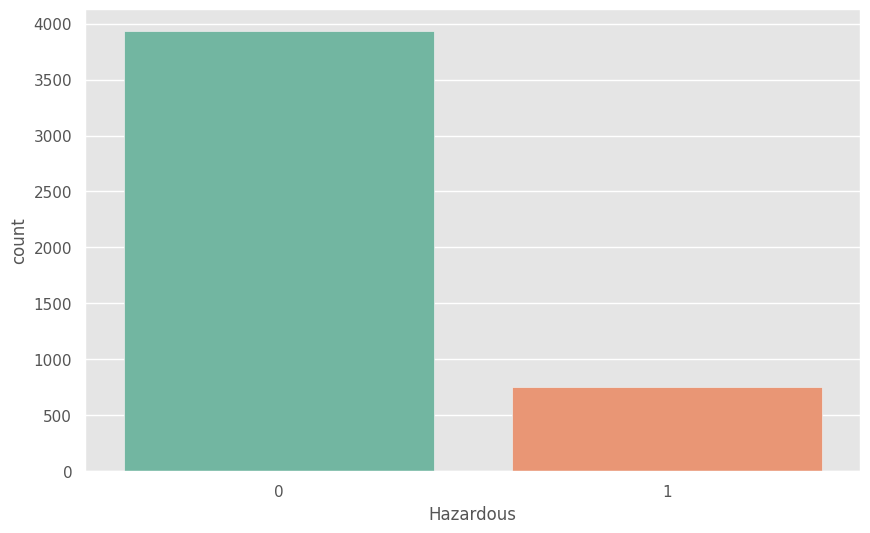

In [ ]:
# Count plot of a single categorical variable
sns.countplot(x='Hazardous', data=asteroidData,palette='Set2')

# Show the plot
plt.show()

We are going to balance the dataset for this example

In [ ]:
not_hazard = asteroidData[asteroidData['Hazardous'] == 0]


In [ ]:
not_hazard.shape


(3932, 21)

In [ ]:
hazard = asteroidData[asteroidData['Hazardous'] == 1]


In [ ]:
hazard.shape


(755, 21)

We are going to extract the first 1000 samples of not hazard asteroids

In [ ]:
df = pd.concat([not_hazard[:1000],hazard], axis=0)


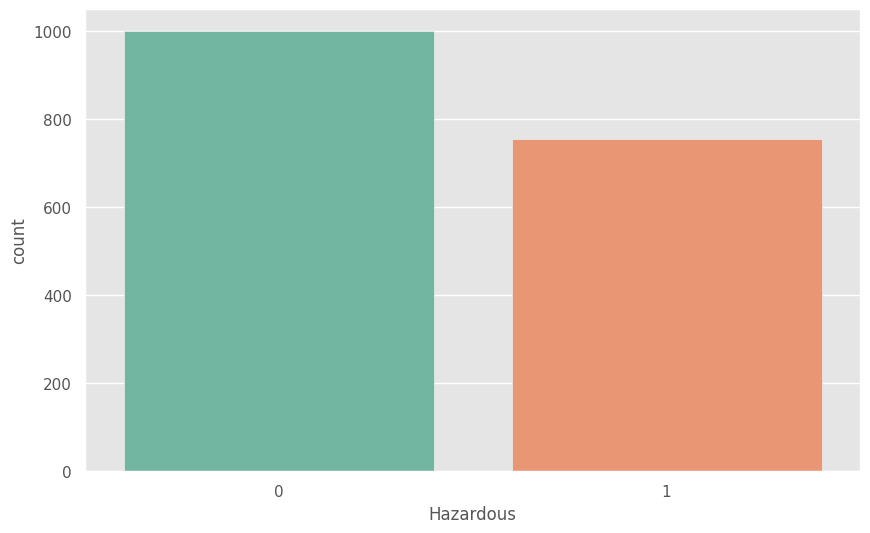

In [ ]:
# Count plot of a single categorical variable
sns.countplot(x='Hazardous', data=df,palette='Set2')

# Show the plot
plt.show()

Now, that we have balanced our dataset. Let's do a correlation check

<Axes: >

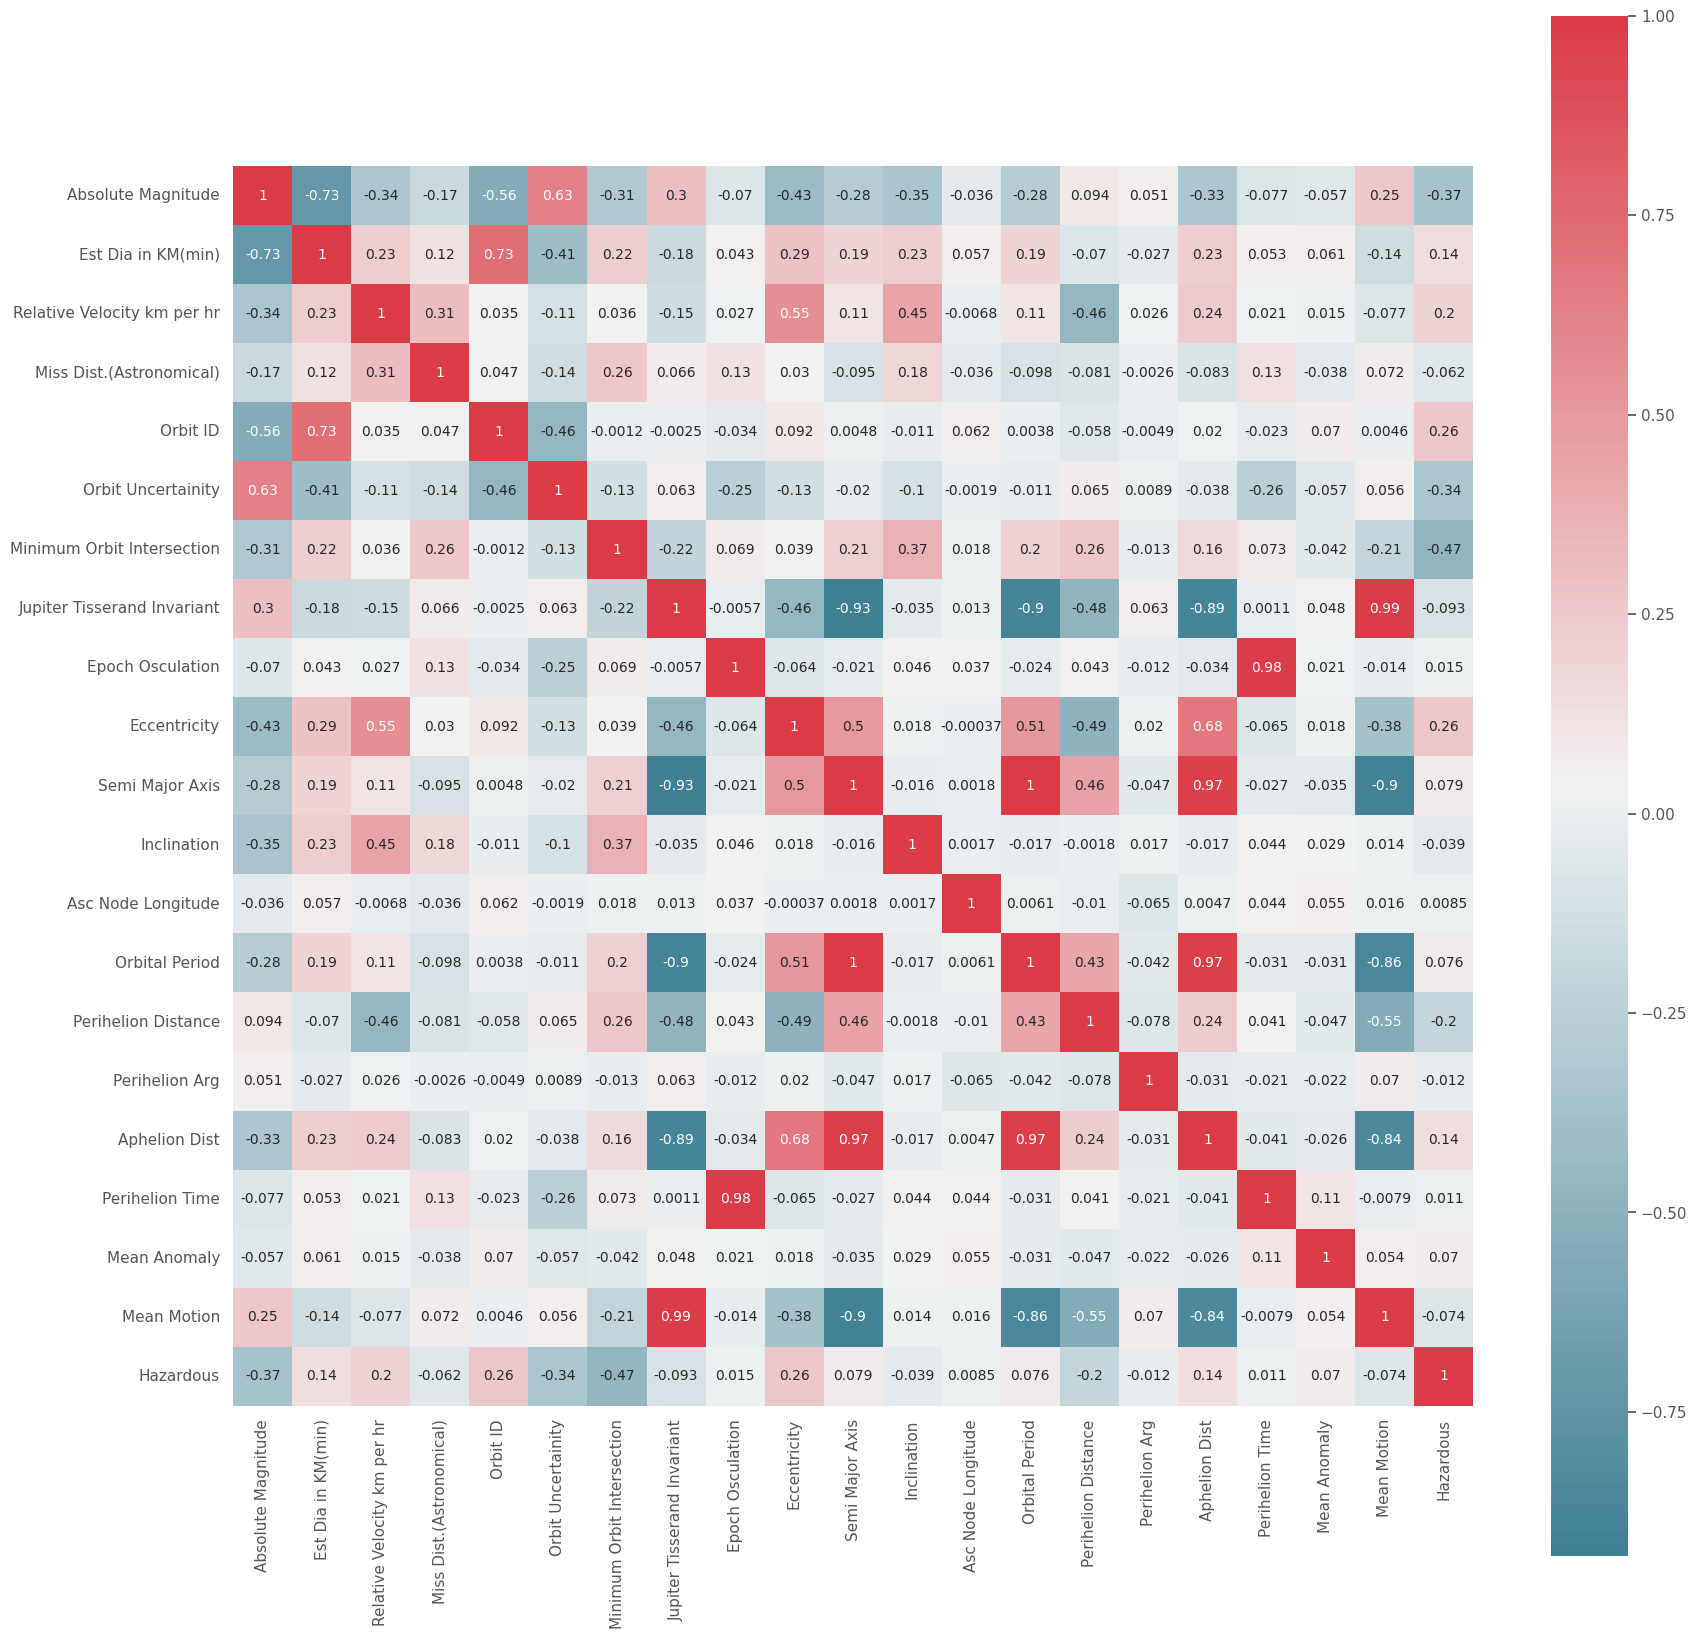

In [ ]:
# heatplot
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

To perform a classification model we need to extract the label or target from the dataset

In [ ]:
# separating the classlabel from the features
y = df.Hazardous.values
X = df.drop(['Hazardous'],axis=1)

If the values of feature variables are too large then they end up contributing more to the target variables even if they are not related. That’s why we must normalize them before implementing the algorithm on them.The library we will use to perform this is called Standard Scaler which will perform a standard scaling of every variable.

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
sc = StandardScaler()


In [ ]:
X = sc.fit_transform(X)

In [ ]:
X[:2]

array([[ 0.03826206, -0.37442003,  0.3539568 ,  0.76632374, -0.38346206,
         0.29157787,  1.47146209,  0.22190705,  0.22005277, -0.28281672,
        -0.47117332,  1.29953097, -0.37694182, -0.49031058, -0.15069896,
         1.2618344 , -0.47523068, -0.00311567, -0.11958224,  0.19482985],
       [ 2.43824406, -0.80585627, -0.57844015,  0.05754735, -0.71148013,
         1.43636346, -0.75388262, -0.07025536,  0.22005277, -1.01593167,
        -0.17359012, -0.56394959, -1.15435728, -0.23590362,  0.9646261 ,
        -1.62533329, -0.44171201,  0.10826864, -1.13571373, -0.22393209]])

# Split the dataset into training and test set using train_test_split function.

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [ ]:
from sklearn.linear_model import LogisticRegression
import time

# Using Logistic Regression for model building.

In [ ]:
lr = LogisticRegression()

start_time = time.time()

lr.fit(X_train,y_train)

delta_time = (time.time() - start_time)

In [ ]:
y_predict = lr.predict(X_test)


# Model Evaluation


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print("---------- TRAINING TIME --------------")
print("     ",delta_time)

print("                                ")
print("                                ")
print("-------- Classification Report --------")
print("                                ")
print("                                ")
print(classification_report(y_test,y_predict))

---------- TRAINING TIME --------------
      0.07052421569824219
                                
                                
-------- Classification Report --------
                                
                                
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       205
           1       0.91      0.93      0.92       146

    accuracy                           0.93       351
   macro avg       0.93      0.93      0.93       351
weighted avg       0.93      0.93      0.93       351



# Assigment

* Interpret the results of the confusion matrix in the context of this dataset. Which is the right metric to perfom hyperparameter tunning?

* What is the ROC curve? Why is the ROC curve useful in evaluating the performance of a classification model? How does it help in selecting the decision threshold? Plot the ROC Curve

* Logistic regression by default uses a 0.5 decision threshold for classification. For imbalanced datasets, you might want to adjust this threshold. Experiment with different thresholds and observe the impact on precision, recall, and F1-score.

* Retrain the model using the full dataset. Test a SVM model a Decision Tree and then implement an Ensemble Learning using the 3 models.

* Train a Random Forest and see if you can win the previous ensemble model. You can use **GridSearchCV** or other tools to optimize the hyperparameters.

